## 15. Threshold Models

**Exercise 15.1**. Fit a TAR model for the predator series with delay set to 2, and interpret the findings by making use of the framework studied in Stenseth et al. (1998, 1999). (You may first want to check whether or not their framework is approximately valid for the TAR model.) Also, compare the fitted model with the TAR(2;1,4) model with delay 3 reported in the text. (The data file is named `veilleux`.)

**Solution**.

Let's fit the data series for the predator numbers (without its starting points) to a TAR model with $d = 2$ and with $d = 3$, using the same methodology as in the text.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
%run tar.py

In [3]:
# Load and select the predator data series
Y = pd.read_csv('../data/veilleux.dat', sep=' ')['Didinium']

# Filter out quasiperiodic start
Y = np.r_[Y[14:]]

In [4]:
model_d2 = tar(np.log(Y), p1=4, p2=4, d=2, a=.1, b=.9, display=True)

Model: SETAR(2, 1, 4), with model delay 2
Estimated threshold 4.048, from a Minimum AIC fit with thresholds.
Searched from the 17.0 percentile to the 81.1 percentile of all data.
The estimated threshold is 26.4 percentile of all data.
Nominal AIC: 12.15


|                               Lower Regime                                 |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     16.66
Date:                Tue, 02 Jun 2020   Prob (F-statistic):            0.00152
Time:                        13:18:33   Log-Likelihood:                0.93279
No. Observations:                  14   AIC:                             2.134
Df Residuals:                      12   BIC:                             3.413
Df Model:                       

c:\programdata\miniconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [5]:
model_d3 = tar(np.log(Y), p1=4, p2=4, d=3, a=.1, b=.9, display=True)

Model: SETAR(2, 1, 4), with model delay 3
Estimated threshold 4.661, from a Minimum AIC fit with thresholds.
Searched from the 17.0 percentile to the 81.1 percentile of all data.
The estimated threshold is 56.6 percentile of all data.
Nominal AIC: 10.92


|                               Lower Regime                                 |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.67e-14
Time:                        13:18:33   Log-Likelihood:                 2.0310
No. Observations:                  30   AIC:                          -0.06204
Df Residuals:                      28   BIC:                             2.740
Df Model:                       

The model estimated with delay $d = 2$ is selected as SETAR(2, 4, 3), and the threshold splits 26.4% of the data, while the model estimated with delay $d = 3$ is selected as SETAR(2, 1, 1), and the threshold splits 56.65% of the data; this means that the model with delay 3 is more balanced (with a split closer to 50%).

Additionally, the estimated noise variances are generally smaller on the model with delay $d = 3$, and its AIC is also smaller. 

Finally, looking at the skeletons, the cycle doesn't quite converge within tolerances with default values for delay $d = 2$, though it appears to have a cycle of length 10.  Convergence within cycle 10 is achieved, and the skeleton looks almost piecewise linear.

No limit cycle
Tail part of the skeleton:
[3.87258113 4.13952893 4.35921497 4.93962869 5.36941061 5.48107754
 5.28526672 4.80753307 4.26420804 3.89704364 3.86149858 4.13040849
 4.35170926 4.9405048  5.37750886 5.49262611 5.29589319 4.81231603
 4.26092083 3.88701083 3.84887901 4.12002315 4.34316259 4.94112353
 5.38638465 5.50556021 5.30796204 4.81797937 4.25753672 3.87593218
 3.8346974  4.10835232 4.33355803 4.94175655 5.39630225 5.52005974
 5.32151961 4.82437941 4.25379276 3.86353905 3.81879132 4.09526234
 4.32278556 4.94245616 5.40741635 5.53631648 5.3367249  4.83156362
 4.24960336 3.84964839]


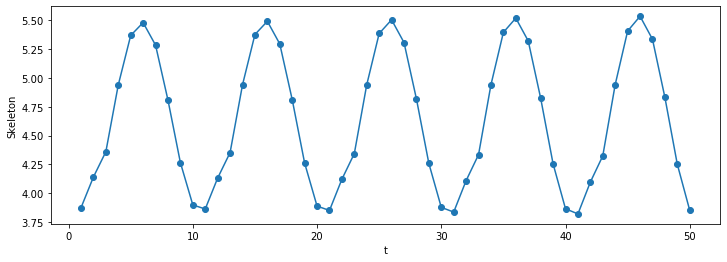

In [6]:
plt.figure(figsize=(12, 4))
tar_skeleton(model_d2);

Limit cycle of length 10
Cycle:
[4.68050044 4.33893353 3.92274183 3.82226981 4.15134606 4.48619123
 4.82690646 5.17359465 5.52636052 5.15865704]


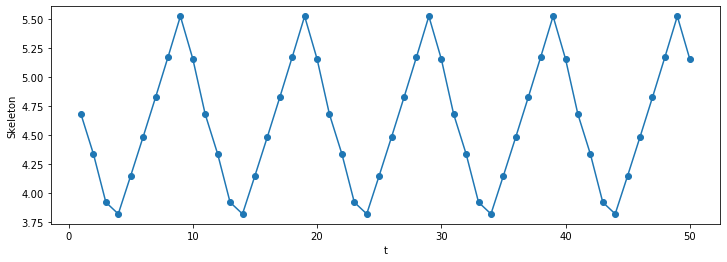

In [7]:
plt.figure(figsize=(12, 4))
tar_skeleton(model_d3);

**Exercise 15.2**. Fit a TAR model to the square-root-transformed relative sunspot data, and examine its goodness of fit. Interpret the fitted TAR model. (The data file is named `spots`.)

**Solution**.

As in Exhibit 15.11, we can search through models with multiple delays based on AIC:

In [8]:
Y = pd.read_csv('../data/spots.dat')['spots']

In [9]:
max_d = 5
max_p = 5

AICM = pd.DataFrame(columns=['d', 'Nominal AIC', 'r', 'p1', 'p2'])

for d in range(1, max_d + 1):
    model_spots = tar(np.sqrt(Y), p1=max_p, p2=max_p, d=d, a=.1, b=.9)
    AICM = AICM.append({
        'd': d, 'Nominal AIC': model_spots['AIC'], 
        'r': model_spots['thd'], 'p1': model_spots['p1'], 'p2': model_spots['p2']
    }, ignore_index=True)

AICM

,d,Nominal AIC,r,p1,p2
0,1.0,149.921169,5.882176,5.0,5.0
1,2.0,110.459146,6.058052,3.0,5.0
2,3.0,124.569568,6.595453,2.0,5.0
3,4.0,126.195863,8.043631,3.0,5.0
4,5.0,150.467085,8.154753,4.0,5.0


The model with best AIC has delay 2, and is a SETAR(2, 3, 5) model:

In [10]:
model_spots = tar(np.sqrt(Y), p1=3, p2=5, d=2, a=.1, b=.9, display=True)

Model: SETAR(2, 3, 5), with model delay 2
Estimated threshold 6.058, from a Minimum AIC fit with thresholds.
Searched from the 12.5 percentile to the 78.6 percentile of all data.
The estimated threshold is 35.7 percentile of all data.
Nominal AIC: 110.5


|                               Lower Regime                                 |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.77e-10
Time:                        13:18:34   Log-Likelihood:                -24.176
No. Observations:                  20   AIC:                             56.35
Df Residuals:                      16   BIC:                             60.33
Df Model:                       

Since the largest delay on the upper regime is not significant ($\hat{\phi}_{2, 5}$ has p-value 0.144), we refit the model as a SETAR(2, 3, 4):

In [11]:
model_spots = tar(np.sqrt(Y), p1=3, p2=4, d=2, a=.1, b=.9, display=True)

Model: SETAR(2, 3, 4), with model delay 2
Estimated threshold 6.058, from a Minimum AIC fit with thresholds.
Searched from the 12.3 percentile to the 82.5 percentile of all data.
The estimated threshold is 35.1 percentile of all data.
Nominal AIC: 113.7


|                               Lower Regime                                 |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     97.07
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.77e-10
Time:                        13:18:34   Log-Likelihood:                -24.176
No. Observations:                  20   AIC:                             56.35
Df Residuals:                      16   BIC:                             60.33
Df Model:                       

Next, running diagnostics:

- The standardized residuals show no pattern
- The ACF of the residuals do not display correlation
- The p-values for the Portmanteau test shows all values above 0.05
- The QQ plot looks reasonable, and the Shapiro-Wilk normality test cannot reject normality of the residuals.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro

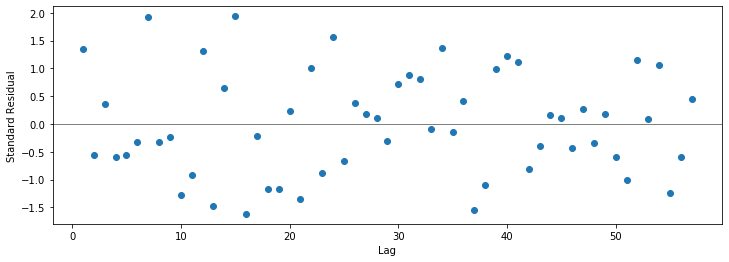

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(model_spots['std_res']))+1, model_spots['std_res'], linestyle='none', marker='o')
plt.axhline(color='black', linewidth=0.5)
plt.xlabel('Lag')
plt.ylabel('Standard Residual')
plt.show()

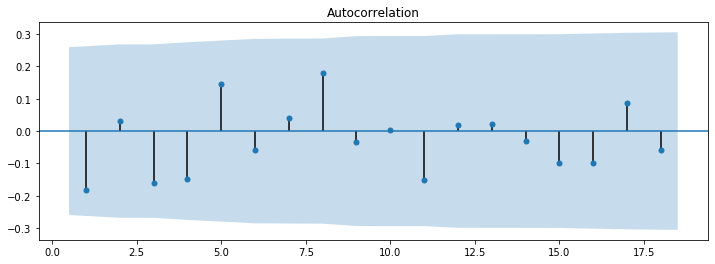

In [14]:
plt.figure(figsize=(12, 4))
plot_acf(model_spots['std_res'], zero=False, ax=plt.gca())
plt.show();

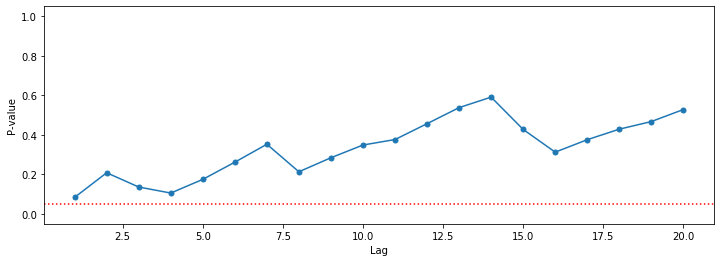

In [15]:
# TAR-specific generalized Portmanteau test
plt.figure(figsize=(12, 4))
gBox_tar(model_spots);

In [16]:
# Shapiro-Wilk normality test

W, p_value = shapiro(model_spots['std_res'])
p_value

0.26674342155456543

**Exercise 15.3**. Predict the annual relative sunspot numbers for ten years using the fitted model obtained in Exercise 15.2. Draw the prediction intervals and the predicted medians. (The data file is named `spots`.)

**Exercise 15.4**. Examine the long-run behavior of the skeleton of the fitted model for the relative sunspot data. Is the fitted model likely to be stationary? Explain your answer. 

**Exercise 15.5**. Simulate a series of size 1000 from the TAR model fitted to the relative sunspot data. Compute the spectrum of the simulated realization and compare it with the spectrum of the data. Does the fitted model capture the correlation structure of the data? 

**Exercise 15.6**. Draw the lagged regression plots for the square-root-transformed hare data. Is there any evidence that the hare data are nonlinear? (The data file is named `hare`.)

**Exercise 15.7**. Carry out formal tests (Keenan’s test, Tsay’s test, and threshold likelihood ratio test) for nonlinearity for the hare data. Is the hare abundance process nonlinear? Explain your answer. (The data file is named `hare`.)

**Exercise 15.8**. Assuming that the hare data are nonlinear, fit a TAR model to the hare data and examine the goodness of fit. (The data file is named `hare`.)

**Exercise 15.9**. This exercise assumes that the reader is familiar with Markov chain theory. Consider a simple TAR model that is piecewise constant: 

$$
Y_t = \begin{cases}
\phi_{1,0} + \sigma_1 e_t &\text{if } Y_{t-1} \leq r\\
\phi_{2,0} + \sigma_2 e_t &\text{if } Y_{t-1} > r
\end{cases}
$$

where $\{e_t\}$ are independent standard normal random variables. Let $R_t = 1$ if $Y_t \leq r$ and 2 otherwise, which is a Markov chain.

**(a)** Find the transition probability matrix of Rt and its stationary distribution.

**(b)** Derive the stationary distribution of {Yt}.

**(c)** Find the lag 1 autocovariance of the TAR process. 